In [1]:
import os
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from scipy import optimize
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools
import math
palette=sns.color_palette()

fparams =  {'xtick.labelsize': 22,
            'ytick.labelsize': 22,
            'axes.labelsize': 26,
            'axes.titlesize': 22,
            'font.size': 22,
            'legend.fontsize': 20,
            'text.usetex': True,
            'legend.frameon' : False,
            'svg.fonttype': 'path',
            'lines.linewidth': 2.5,
             
            'lines.markersize': 10}

plt.rcParams.update(fparams)

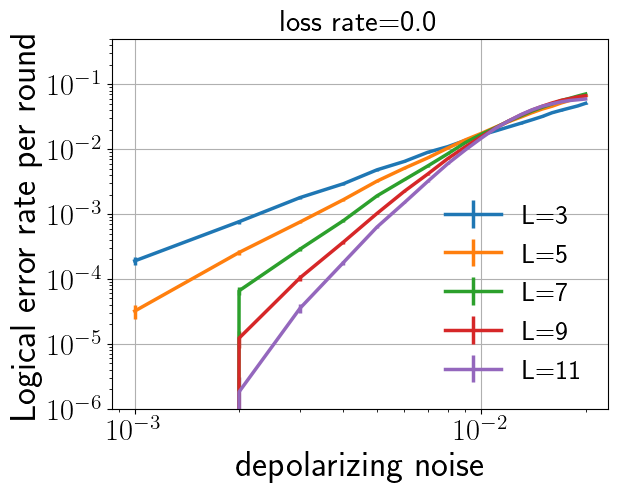

In [2]:
#Logical error rate at a fixed loss rate

Ls = range(3,13,2)#list of distances to plot
loss=0.0#loss probability

log_errors_all= []
depo_all=[]
num_shots_all=[]

#load the results
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        

#plot the results
plt.figure()
for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    
    #compute the logical error per round and the associate derror bar
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
    plt.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
plt.xlabel("depolarizing noise")
plt.ylabel("Logical error rate per round")
plt.title('loss rate={}'.format(loss))
plt.grid()
plt.yscale("log")
plt.xscale('log')
#plt.xlim(0.003,0.007)
plt.ylim(10**(-6),0.5)
plt.legend(loc=0);

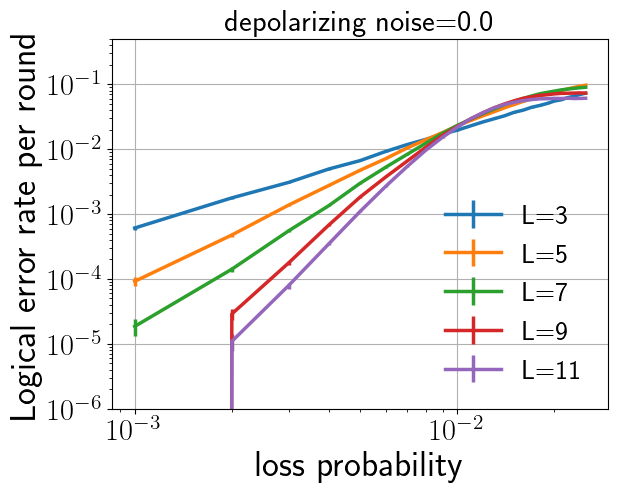

In [3]:
#Logical error rate at a fixed depolarizing noise probability


Ls = range(3,13,2)#list of distances to plot
depo=0.0 #depolarizing noise probability

log_errors_all= []
loss_rate_all=[]
num_shots_all=[]


#load the results
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_depo_noise={}.pkl'.format(L,L,L,depo), 'rb') as fp:
        data_saved=pickle.load(fp)
    loss_rate=sorted(list(data_saved.keys()))
    for p in loss_rate:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    loss_rate_all.append(loss_rate)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        

#plot the results
plt.figure()
for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,loss_rate_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
    
    plt.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
plt.xlabel("loss probability")
plt.ylabel("Logical error rate per round")
plt.title('depolarizing noise={}'.format(depo))
plt.grid()
plt.yscale("log")
plt.xscale('log')
plt.ylim(10**(-6),0.5)
plt.legend(loc=0);

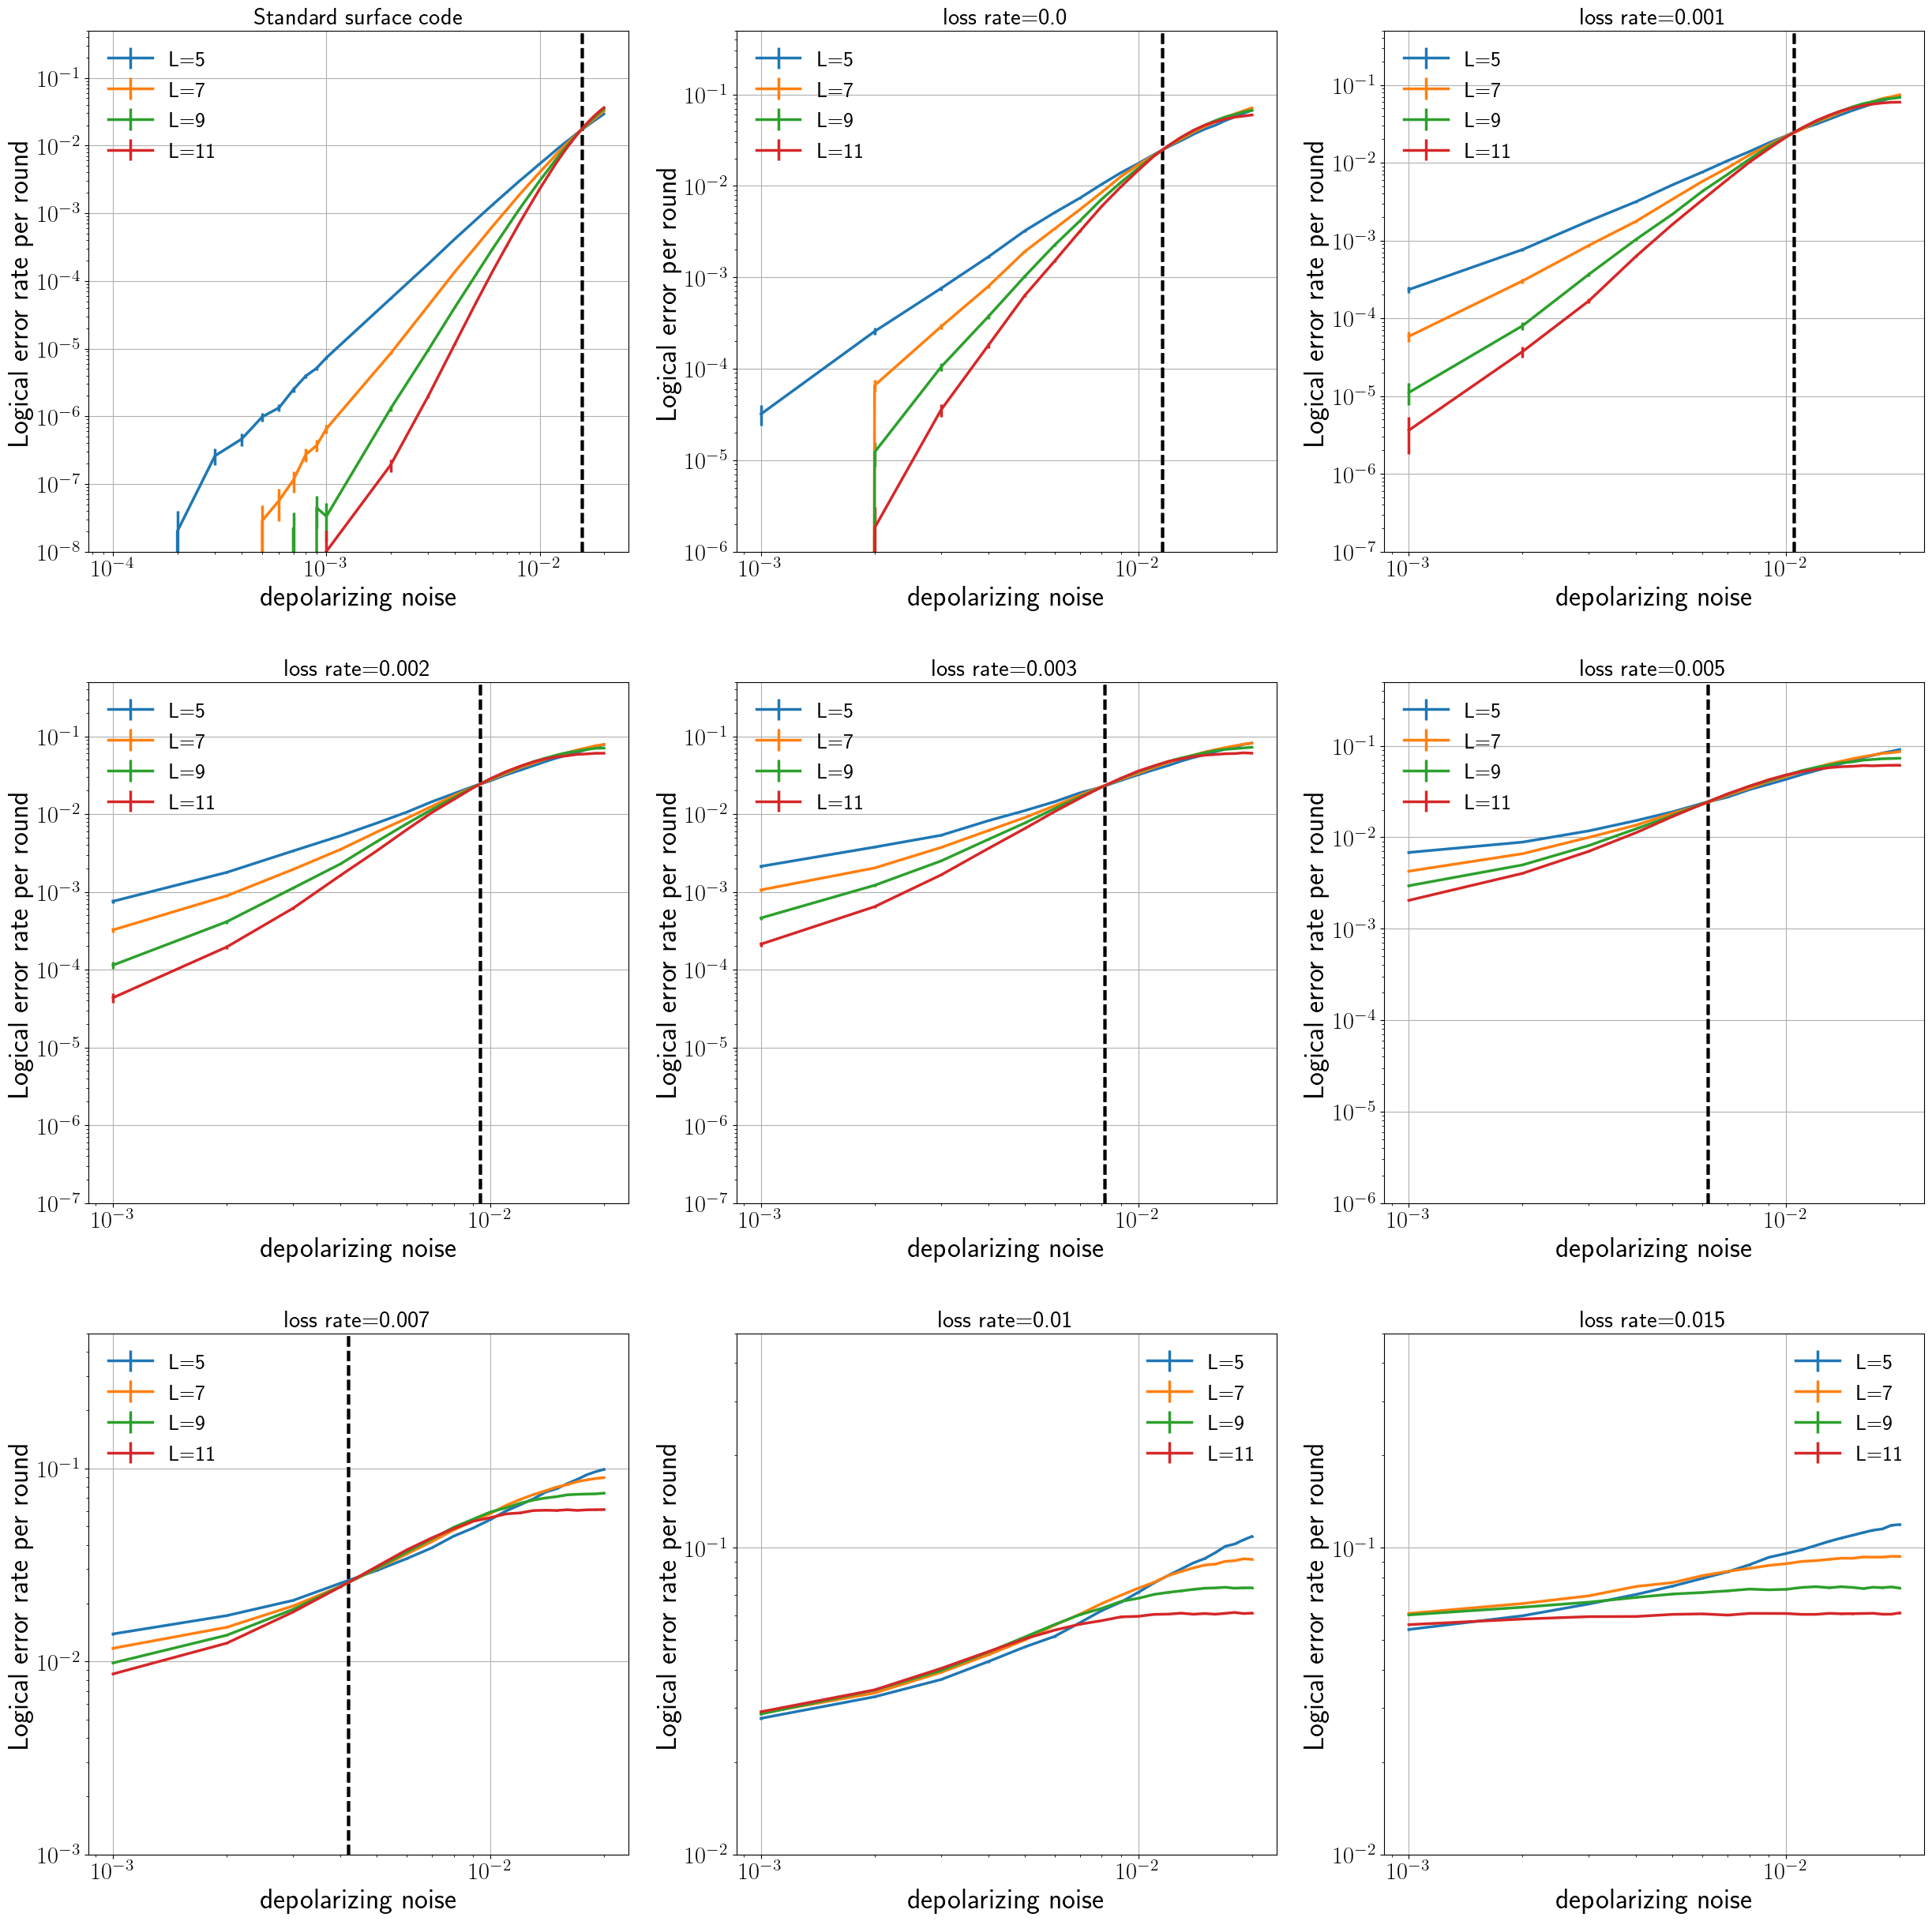

In [5]:
#logical error at various loss proabilities

from matplotlib.markers import MarkerStyle
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset




fig = plt.figure(figsize=(30, 30))
table = gridspec.GridSpec(ncols=3, nrows=3)


ax1 = fig.add_subplot(table[0, 0])

ax2 = fig.add_subplot(table[0, 1])

ax3 = fig.add_subplot(table[0, 2])

ax4 = fig.add_subplot(table[1, 0])

ax5 = fig.add_subplot(table[1, 1])

ax6 = fig.add_subplot(table[1, 2])

ax7 = fig.add_subplot(table[2, 0])

ax8 = fig.add_subplot(table[2, 1])

ax9 = fig.add_subplot(table[2, 2])




Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]

for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_standard_surface_code_d={}.pkl'.format(L), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
   
    ax1.axvline(x=0.0158,linestyle='--',color='black')
    
    
    ax1.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
ax1.set_xlabel("depolarizing noise")
ax1.set_ylabel("Logical error rate per round")
ax1.set_title('Standard surface code')
ax1.grid()
ax1.set_yscale("log")
ax1.set_xscale('log')
ax1.set_ylim(10**(-8),0.5)
ax1.legend(loc=0);





Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.00
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    

for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    ax2.axvline(x=0.0116,linestyle='--',color='black')
   
    
    ax2.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))

ax2.set_xlabel("depolarizing noise")
ax2.set_ylabel("Logical error  per round")
ax2.set_title('loss rate={}'.format(loss))
ax2.grid()
ax2.set_yscale("log")
ax2.set_xscale('log')
ax2.set_ylim(10**(-6),0.5)
ax2.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.001
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    ax3.axvline(x=0.0105,linestyle='--',color='black')
    
    ax3.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax3.set_xlabel("depolarizing noise")
ax3.set_ylabel("Logical error rate per round")
ax3.set_title('loss rate={}'.format(loss))
ax3.grid()
ax3.set_yscale("log")
ax3.set_xscale('log')
ax3.set_ylim(10**(-7),0.5)
ax3.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.002
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax4.axvline(x=0.0094,linestyle='--',color='black')
   
    ax4.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax4.set_xlabel("depolarizing noise")
ax4.set_ylabel("Logical error rate per round")
ax4.set_title('loss rate={}'.format(loss))
ax4.grid()
ax4.set_yscale("log")
ax4.set_xscale('log')
ax4.set_ylim(10**(-7),0.5)
ax4.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.003
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax5.axvline(x=0.00815,linestyle='--',color='black')
   
    ax5.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax5.set_xlabel("depolarizing noise")
ax5.set_ylabel("Logical error rate per round")
ax5.set_title('loss rate={}'.format(loss))
ax5.grid()
ax5.set_yscale("log")
ax5.set_xscale('log')
ax5.set_ylim(10**(-7),0.5)
ax5.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.005
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax6.axvline(x=0.0062,linestyle='--',color='black')
   
    ax6.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax6.set_xlabel("depolarizing noise")
ax6.set_ylabel("Logical error rate per round")
ax6.set_title('loss rate={}'.format(loss))
ax6.grid()
ax6.set_yscale("log")
ax6.set_xscale('log')
ax6.set_ylim(10**(-6),0.5)
ax6.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.007
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax7.axvline(x=0.0042,linestyle='--',color='black')
   
    ax7.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax7.set_xlabel("depolarizing noise")
ax7.set_ylabel("Logical error rate per round")
ax7.set_title('loss rate={}'.format(loss))
ax7.grid()
ax7.set_yscale("log")
ax7.set_xscale('log')
ax7.set_ylim(10**(-3),0.5)
ax7.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.01
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

   
    ax8.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax8.set_xlabel("depolarizing noise")
ax8.set_ylabel("Logical error rate per round")
ax8.set_title('loss rate={}'.format(loss))
ax8.grid()
ax8.set_yscale("log")
ax8.set_xscale('log')
ax8.set_ylim(10**(-2),0.5)
ax8.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.015
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]


   
    ax9.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax9.set_xlabel("depolarizing noise")
ax9.set_ylabel("Logical error rate per round")
ax9.set_title('loss rate={}'.format(loss))
ax9.grid()
ax9.set_yscale("log")
ax9.set_xscale('log')
ax9.set_ylim(10**(-2),0.5)
ax9.legend(loc=0);

table.update(hspace=0.25)

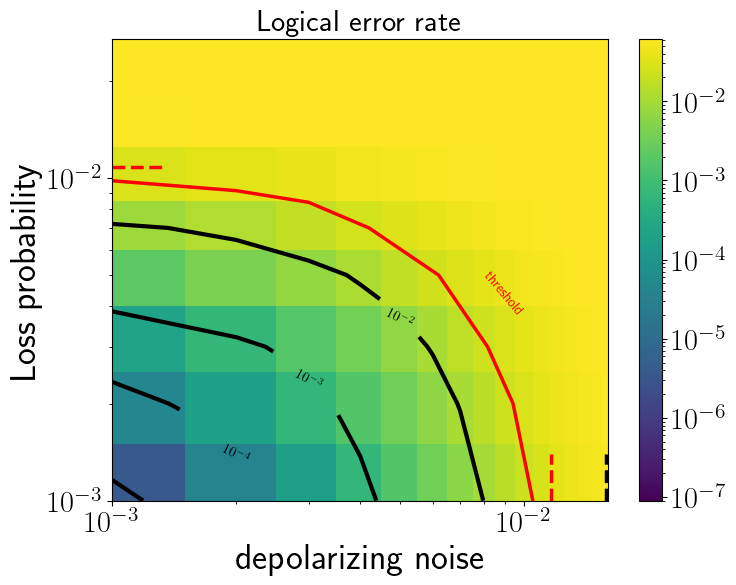

In [6]:
#Color map of the logical error rate for finite depolarizing noise and atom loss probabilities in Log-Log scale

#threshold line
threshold_depo=[0.0116,0.0105,0.0094,0.00815,0.0062,0.0042,0.003,0.002,0.001,0]
threshold_loss=[0.0,0.001,0.002,0.003,0.005,0.007,0.0084,0.00913,0.0098,0.0108]

L = 11#distance of the code
log_errors_all= []
depo_max=0.016#maximal depolarizing noise plotted
loss_rate = [0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.02,0.025]#list of loss probabilities
depo_all = []
num_shots_all=[]
loss_rate_all = []

#Load results
for loss in loss_rate:
    log_errors=[]
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    depo2=[]
    for p in depo:
        if p<=depo_max:
            depo2.append(p)
            log_errors.append(data_saved[p]['error_rate'])

    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]

    depo_all.append(depo2)
    log_errors_all.append(errors_per_round)
    loss_rate_all.append([loss]*len(depo2))

#color bar limits
min_error=min([error for log_errors in log_errors_all for error in log_errors if error != 0])

#color bar scale
cmap = plt.get_cmap('viridis')
norm = LogNorm(vmin=9e-8, vmax=max(list(itertools.chain.from_iterable(log_errors_all))))
  

# Create the plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(depo_all,loss_rate_all, log_errors_all, shading='auto', cmap=cmap,norm=norm)
plt.colorbar()


# Define contour levels
contour_levels = [1e-5,1e-4,1e-3,1e-2]  # Specify your contour levels here
contour_levels_text = [r'$10^{-5}$',r'$10^{-4}$',r'$10^{-3}$',r'$10^{-2}$']
fmt={level: txt for level,txt in zip(contour_levels,contour_levels_text)}
contour_colors = [cmap(norm(level)) for level in contour_levels]
contours = plt.contour(depo_all,loss_rate_all, log_errors_all, levels=contour_levels, colors='k', linewidths=3)

# Add labels to the contours with proper formatting
plt.clabel(contours, inline=True, fontsize=10, fmt=fmt)

#Plot threshold
thresh=plt.plot(threshold_depo,threshold_loss,'-',color='red')
plt.text(0.008, 0.005, r'threshold', color='r', fontsize=10,rotation=-50, rotation_mode='anchor')


plt.axvline(x=0.0116,ymin=-0,ymax=0.1,linestyle='--',color='red')
plt.axvline(x=0.0158,ymin=-0,ymax=0.1,linestyle='--',color='black')
plt.axhline(y=0.0108,xmin=-0,xmax=0.1,linestyle='--',color='red')

plt.xscale('log')
plt.yscale('log')

plt.ylim([1e-3,2.7e-2])
plt.xlim([1e-3,1.6e-2])

plt.xlabel('depolarizing noise')
plt.ylabel('Loss probability')
plt.title('Logical error rate')
plt.show()

# Plot for the article

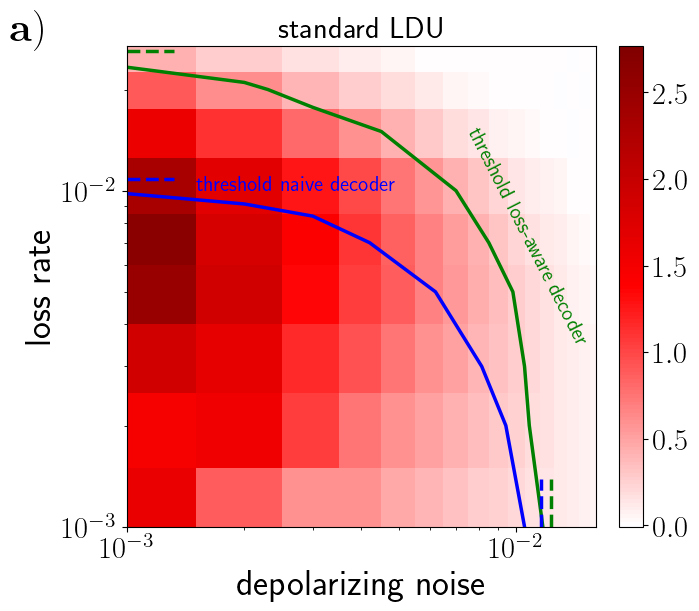

In [9]:

# Create a grid of x and y values

depo_max=0.016
L =11

#threshold loss _aware decoder
threshold_aware_depo=[0.0123,0.0117,0.0108,0.0105,0.0098,0.0085,0.007,0.0045,0.003,0.0023,0.002,0.001,0]
threshold_aware_loss=[0,0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.0177,0.02,0.021,0.0233,0.026]

#threshold naive decoder
threshold_naive_depo=[0.0116,0.0105,0.0094,0.00815,0.0062,0.0042,0.003,0.002,0.001,0]
threshold_naive_loss=[0.0,0.001,0.002,0.003,0.005,0.007,0.0084,0.00913,0.0098,0.0108]

loss_rate = [0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.02,0.025]#list of loss probabilities

gain_all= []
loss_rate_all = []
depo_all = []
#Load results
for loss in loss_rate:
    #load naive decoder results
    log_errors=[]
    depo2=[]    
    with open('data/logical_error/naive_logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        if p<=depo_max:
            depo2.append(p)
            log_errors.append(data_saved[p]['error_rate'])

    errors_per_round_naive=[1-(1-error)**(1/L) for error in log_errors]
    depo_all.append(depo2)
    loss_rate_all.append([loss]*len(depo2))
    
    #load loss_aware decoder results
    log_errors=[]    
    with open('data/logical_error/logical_error_standard_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        if p<=depo_max:
            log_errors.append(data_saved[p]['error_rate'])
            
    errors_per_round_aware=[1-(1-error)**(1/L) for error in log_errors]
    gain=[-np.log10(aware/naive) if naive!=0 else math.inf for aware, naive  in zip(errors_per_round_aware,errors_per_round_naive)]
    gain_all.append(gain)

#cut off for the gain    
min_gain = -0.007805020939541052
max_gain = 2.769763895579185
gain_all_bis=[[max_gain if g==math.inf else min_gain if g==-math.inf else g for g in gain] for gain in gain_all]
cmap = plt.get_cmap('seismic')


# Create the plot
fig, ax = plt.subplots(figsize=(7,6), layout='constrained')

#plot loss-aware threshold
ax.plot(threshold_aware_depo,threshold_aware_loss,'-',color='green')
ax.text(0.0075, 0.015, r'threshold loss-aware decoder', color='g', fontsize=15,rotation=-63, rotation_mode='anchor')

#plot naive threshold
ax.plot(threshold_naive_depo,threshold_naive_loss,'-',color='b')
ax.text(0.0015, 0.01, r'threshold naive decoder', color='b', fontsize=15,rotation=0, rotation_mode='anchor')

ax.pcolormesh(depo_all,loss_rate_all, gain_all_bis, shading='auto',cmap=cmap,vmin=-max_gain,vmax=max_gain)

#color bar limits
cb=fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(-max_gain,max_gain), cmap='seismic'),ax=ax, orientation='vertical')
cb.ax.set_ylim([min_gain,max_gain])

ax.axvline(x=0.0123,ymin=-0,ymax=0.1,linestyle='--',color='green')
ax.axhline(y=0.026,xmin=-0,xmax=0.1,linestyle='--',color='green')

ax.axvline(x=0.0116,ymin=-0,ymax=0.1,linestyle='--',color='b')
ax.axhline(y=0.0108,xmin=-0,xmax=0.1,linestyle='--',color='b')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim([1e-3,2.7e-2])
ax.set_xlim([1e-3,1.6e-2])
ax.set_xlabel(r'depolarizing noise')
ax.set_ylabel(r'loss rate')
ax.set_title ('standard LDU')
ax.text(5e-4,0.028,r'${\bf a)}$',fontsize=30)
plt.show()